In [ ]:

# run this code at http://live.sympy.org/
import sympy as sp
sp.init_printing()

from sympy.abc import x #declarar variáveis

In [ ]:
#-- funções de forma elementares
N=sp.zeros(6,1)

#Definindo as variáveis:
x, l, E, A, I = sp.var('x l E A I')

#Definindo as Funções de Forma:
N[0] = 1 - (x/l)
N[1] = 1 - 3*((x**2)/(l**2)) + 2*((x**3)/(l**3))
N[2] = x - 2*((x**2)/l) + ((x**3)/(l**2))
N[3] = (x/l)
N[4] = 3*((x**2)/(l**2)) - 2*((x**3)/(l**3))
N[5] = -((x**2)/l) + ((x**3)/(l**2))

In [ ]:
display(N)

⎡         x     ⎤
⎢     1 - ─     ⎥
⎢         l     ⎥
⎢               ⎥
⎢       2      3⎥
⎢    3⋅x    2⋅x ⎥
⎢1 - ──── + ────⎥
⎢      2      3 ⎥
⎢     l      l  ⎥
⎢               ⎥
⎢        2    3 ⎥
⎢     2⋅x    x  ⎥
⎢ x - ──── + ── ⎥
⎢      l      2 ⎥
⎢            l  ⎥
⎢               ⎥
⎢       x       ⎥
⎢       ─       ⎥
⎢       l       ⎥
⎢               ⎥
⎢     2      3  ⎥
⎢  3⋅x    2⋅x   ⎥
⎢  ──── - ────  ⎥
⎢    2      3   ⎥
⎢   l      l    ⎥
⎢               ⎥
⎢      2    3   ⎥
⎢     x    x    ⎥
⎢   - ── + ──   ⎥
⎢     l     2   ⎥
⎣          l    ⎦

In [ ]:
for i in [1,2,4,5]:
  print('-'*15)
  print(N[i].subs(x,0), N[i].diff(x).subs(x,0), N[i].subs(x,l), N[i].diff(x).subs(x,l))

---------------
1 0 0 0
---------------
0 1 0 0
---------------
0 0 1 0
---------------
0 0 0 1


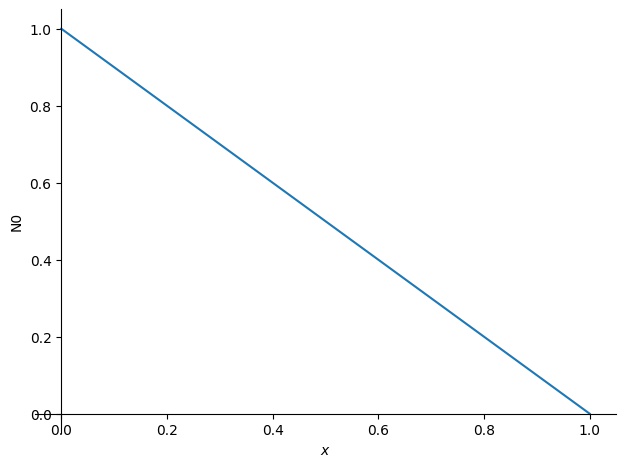

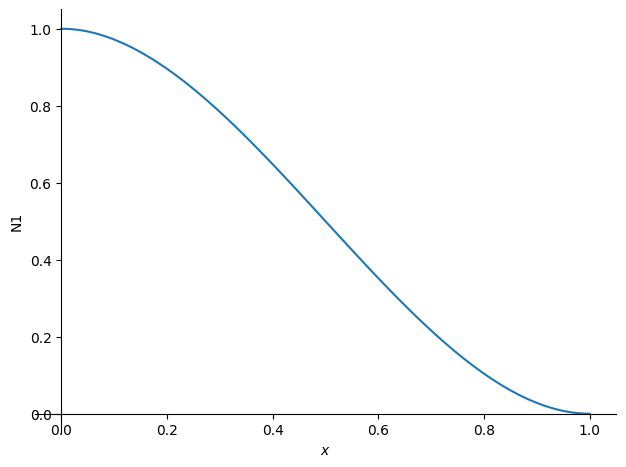

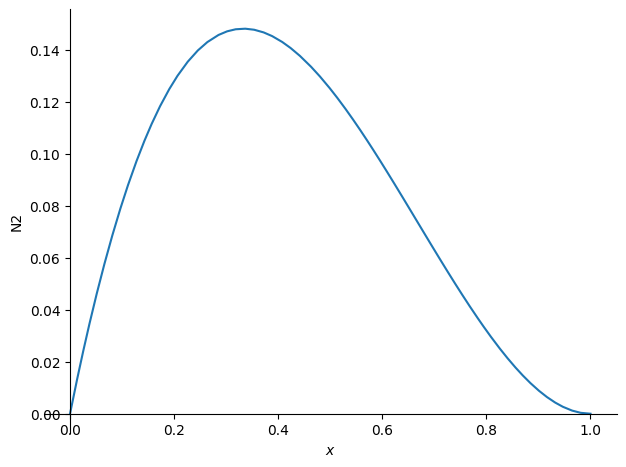

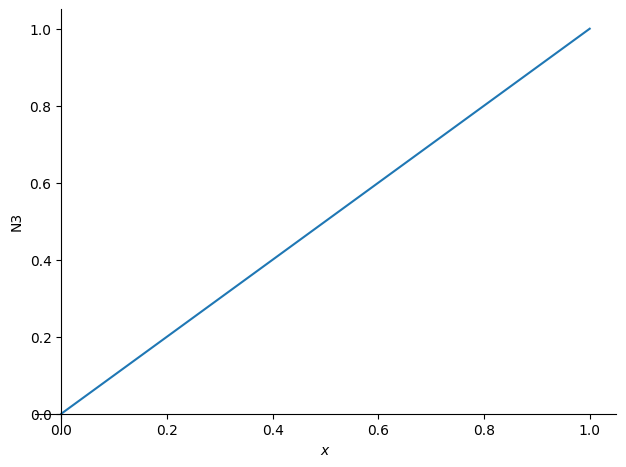

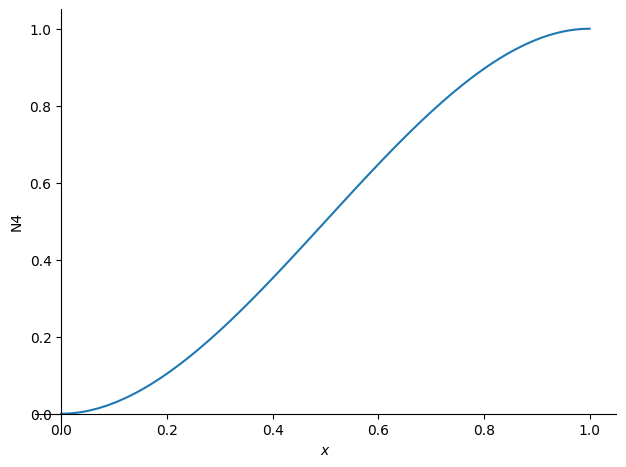

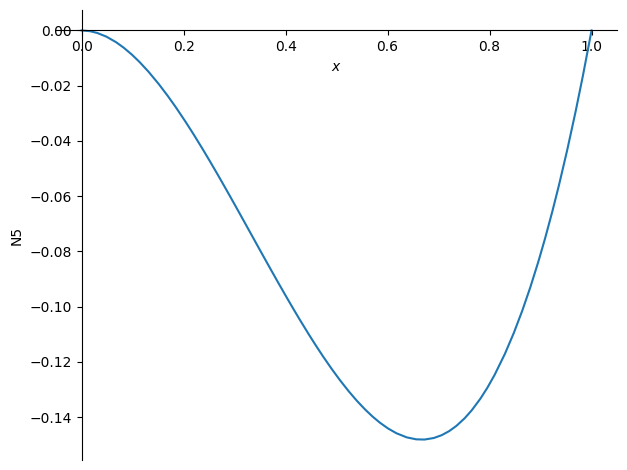

In [ ]:
#-- gráfico das funções de forma elementares
for i in range(len(N)):
  sp.plot(N[i].subs({'l':1}), (x,0,1), ylabel='N'+str(i))

In [ ]:
##-- coeficientes de rigidez axial
k=sp.zeros(rows=6,cols=6)
k,N

⎛                    ⎡         x     ⎤⎞
⎜                    ⎢     1 - ─     ⎥⎟
⎜                    ⎢         l     ⎥⎟
⎜                    ⎢               ⎥⎟
⎜                    ⎢       2      3⎥⎟
⎜                    ⎢    3⋅x    2⋅x ⎥⎟
⎜                    ⎢1 - ──── + ────⎥⎟
⎜                    ⎢      2      3 ⎥⎟
⎜                    ⎢     l      l  ⎥⎟
⎜                    ⎢               ⎥⎟
⎜⎡0  0  0  0  0  0⎤  ⎢        2    3 ⎥⎟
⎜⎢                ⎥  ⎢     2⋅x    x  ⎥⎟
⎜⎢0  0  0  0  0  0⎥  ⎢ x - ──── + ── ⎥⎟
⎜⎢                ⎥  ⎢      l      2 ⎥⎟
⎜⎢0  0  0  0  0  0⎥  ⎢            l  ⎥⎟
⎜⎢                ⎥, ⎢               ⎥⎟
⎜⎢0  0  0  0  0  0⎥  ⎢       x       ⎥⎟
⎜⎢                ⎥  ⎢       ─       ⎥⎟
⎜⎢0  0  0  0  0  0⎥  ⎢       l       ⎥⎟
⎜⎢                ⎥  ⎢               ⎥⎟
⎜⎣0  0  0  0  0  0⎦  ⎢     2      3  ⎥⎟
⎜                    ⎢  3⋅x    2⋅x   ⎥⎟
⎜                    ⎢  ──── - ────  ⎥⎟
⎜                    ⎢    2      3   ⎥⎟
⎜                    ⎢   l      l    ⎥⎟


$\Delta L = NL/EA$

$\varepsilon = N/EA$

$N = EA \varepsilon $

$N = EA \frac{\partial u}{\partial x} $

$u = N_1(x) d_1 + N_4(x) d_4$

$\Delta L = NL/EA$


$EA/L = N/(\Delta L)$


$F = k \Delta x  \Rightarrow N = k \Delta L$

In [ ]:
axial    = [0,3]
for i in axial:
  for j in axial:

    du_j = sp.diff(N[j], x)
    N_i = sp.diff(N[i], x)

    integrando = N_i * du_j

    val   = E*A*sp.integrate( integrando, (x,0,l) )
    k[i,j]= val
    print ('k[',i,',',j,'] = ',val)

k[ 0 , 0 ] =  A*E/l
k[ 0 , 3 ] =  -A*E/l
k[ 3 , 0 ] =  -A*E/l
k[ 3 , 3 ] =  A*E/l


In [ ]:
k

⎡ A⋅E         -A⋅E       ⎤
⎢ ───   0  0  ─────  0  0⎥
⎢  l            l        ⎥
⎢                        ⎥
⎢  0    0  0    0    0  0⎥
⎢                        ⎥
⎢  0    0  0    0    0  0⎥
⎢                        ⎥
⎢-A⋅E          A⋅E       ⎥
⎢─────  0  0   ───   0  0⎥
⎢  l            l        ⎥
⎢                        ⎥
⎢  0    0  0    0    0  0⎥
⎢                        ⎥
⎣  0    0  0    0    0  0⎦

In [ ]:
##-- coeficientes de rigidez de flexão
bending = [1,2,4,5]

for i in bending:
  for j in bending:

    dtheta_j = sp.diff(N[j], x, x)
    M_i = E*I*sp.diff(N[i], x, x)

    integrando =  M_i*dtheta_j

    val   = sp.integrate( integrando , (x,0,l) )
    k[i,j]= val
    print ('k[',i,',',j,'] = ',k[i,j])

k[ 1 , 1 ] =  12*E*I/l**3
k[ 1 , 2 ] =  6*E*I/l**2
k[ 1 , 4 ] =  -12*E*I/l**3
k[ 1 , 5 ] =  6*E*I/l**2
k[ 2 , 1 ] =  6*E*I/l**2
k[ 2 , 2 ] =  4*E*I/l
k[ 2 , 4 ] =  -6*E*I/l**2
k[ 2 , 5 ] =  2*E*I/l
k[ 4 , 1 ] =  -12*E*I/l**3
k[ 4 , 2 ] =  -6*E*I/l**2
k[ 4 , 4 ] =  12*E*I/l**3
k[ 4 , 5 ] =  -6*E*I/l**2
k[ 5 , 1 ] =  6*E*I/l**2
k[ 5 , 2 ] =  2*E*I/l
k[ 5 , 4 ] =  -6*E*I/l**2
k[ 5 , 5 ] =  4*E*I/l


In [ ]:
#Impressão com todos os coeficientes:

for i in range(6):
  for j in range(6):
    print ('k[',i+1,',',j+1,'] = ',k[i,j])

k[ 1 , 1 ] =  A*E/l
k[ 1 , 2 ] =  0
k[ 1 , 3 ] =  0
k[ 1 , 4 ] =  -A*E/l
k[ 1 , 5 ] =  0
k[ 1 , 6 ] =  0
k[ 2 , 1 ] =  0
k[ 2 , 2 ] =  12*E*I/l**3
k[ 2 , 3 ] =  6*E*I/l**2
k[ 2 , 4 ] =  0
k[ 2 , 5 ] =  -12*E*I/l**3
k[ 2 , 6 ] =  6*E*I/l**2
k[ 3 , 1 ] =  0
k[ 3 , 2 ] =  6*E*I/l**2
k[ 3 , 3 ] =  4*E*I/l
k[ 3 , 4 ] =  0
k[ 3 , 5 ] =  -6*E*I/l**2
k[ 3 , 6 ] =  2*E*I/l
k[ 4 , 1 ] =  -A*E/l
k[ 4 , 2 ] =  0
k[ 4 , 3 ] =  0
k[ 4 , 4 ] =  A*E/l
k[ 4 , 5 ] =  0
k[ 4 , 6 ] =  0
k[ 5 , 1 ] =  0
k[ 5 , 2 ] =  -12*E*I/l**3
k[ 5 , 3 ] =  -6*E*I/l**2
k[ 5 , 4 ] =  0
k[ 5 , 5 ] =  12*E*I/l**3
k[ 5 , 6 ] =  -6*E*I/l**2
k[ 6 , 1 ] =  0
k[ 6 , 2 ] =  6*E*I/l**2
k[ 6 , 3 ] =  2*E*I/l
k[ 6 , 4 ] =  0
k[ 6 , 5 ] =  -6*E*I/l**2
k[ 6 , 6 ] =  4*E*I/l


In [ ]:
k

⎡ A⋅E                      -A⋅E                    ⎤
⎢ ───      0         0     ─────     0         0   ⎥
⎢  l                         l                     ⎥
⎢                                                  ⎥
⎢        12⋅E⋅I    6⋅E⋅I          -12⋅E⋅I    6⋅E⋅I ⎥
⎢  0     ──────    ─────     0    ────────   ───── ⎥
⎢           3         2               3         2  ⎥
⎢          l         l               l         l   ⎥
⎢                                                  ⎥
⎢        6⋅E⋅I     4⋅E⋅I          -6⋅E⋅I     2⋅E⋅I ⎥
⎢  0     ─────     ─────     0    ───────    ───── ⎥
⎢           2        l                2        l   ⎥
⎢          l                         l             ⎥
⎢                                                  ⎥
⎢-A⋅E                       A⋅E                    ⎥
⎢─────     0         0      ───      0         0   ⎥
⎢  l                         l                     ⎥
⎢                                                  ⎥
⎢       -12⋅E⋅I   -6⋅E⋅I           12⋅E⋅I   -6